###                                            **XGBOOST**

https://xgboost.readthedocs.io/en/stable/tutorials/model.html

* XGBoost is a high-performance version of the Gradient Boosting algorithm optimized with various modifications.It was started to be used by Tianqi Chen and Carlos Guestrin in the article "XGBoost: A Scalable Tree Boosting System" in 2016. 

* XGBoost has a similar working logic to Gradient Boosting, but there are some differences and advanteges
1. **Regularization** : While there is no regularization in GBM, XGBoost has regularization parameters such as alpha and lambda. therefore it is resistant to 'overfitting'. It's also called ‘regularized boosting‘ technique.It performs regularization process with alpha, lambda and gamma parameters.

2. **Parallel Processing** : It is powered by software and hardware optimization techniques to achieve better results using less resources. So XGBoost implements parallel processing and is much faster compared to GBM.


3. **Tree Pruning** : A GBM stops splitting a node when it encounters a negative loss in the split. Therefore it is more of a greedy algorithm. XGBoost, on the other hand, splits up to the specified max_depth and then starts pruning back the tree, removing splits beyond which there is no positive gain.

4. **System Optimization**

* Cache memory is the type of memory that is used the fastest but has the smallest space. If a program is desired to run fast, the cache should be used at the maximum level. XGBoost calculates similarity score and tree output value in cache. For this reason, quick calculations can be made.

**Steps**

* The first step in XGBoost is to make the first guess, that is, to determine the base score. The base score is usually set at 0.5. So the initial prediction values are 0.5. Then the residuals are obtained by subtracting 0.5 from the actual y values. A tree model is established with these residues obtained as in GBM.


* First, all residuals are collected at the initial node and the similarity score of this node is calculated. Then, trees are created by dividing each independent variable by threshold values. The similarity score and gain value in each tree are calculated.In this way, all possible trees are created and the tree with the highest gain value is continued. These operations are done with greedy algorithm logic.Similarity score is the evaluation metric for nodes. Gain score is an evaluation criterion for trees.

* Similarity Score = (Sum of Residuals)^2 / (number of Residuals + λ )
* Gain = Left Similarity + Right Similarity - Root Similarity

* Since calculating these similarity and gain scores would take a long time on large datasets, xgboost divides the data into quantiles instead of examining each value in the data.

* The default number of quantile is 33. As the number of quantiles increases, xgboost will look at smaller ranges and make better predictions, but at the same time the training time will be longer.An algorithm called "Sketches" is used to overcome this training time problem. The “Sketches” algorithm converges to find the quantiles.

* After the tree with the highest gain score is determined, the pruning process is started.During the pruning process, the "gamma" hyperparameter is used as a metric. if Gain Score < Gamma,the branch is pruned.As gamma increases, the most valuable branches remain on the tree and This pruning helps prevent overfitting.Pruning is done from the bottom to the top. If the bottom branch is not pruned, the upper branches are not examined.

* Prediction is made after the pruning process is completed.The tree prediction is multiplied by the learning rate and added to the prediction value of the first tree, and a new prediction value is formed. These operations continue until the specified number of iterations, namely n_estimators (number of boosting trees).
 * New Prediction = First Prediction + (Learnin Rate)* (Second Prediction)






**Hyperparameters**
* **Booster Parameters** 
1. **eta / learning_rate** :  [default=0.3] , range: [0,1]
* Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.It is a parameter that prevents overfitting. 

2. **min_child_weight** : [default=1],  range: [0,∞]
* Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be. Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can lead to under-fitting.

3. **max_depth** : [default=6], range: [0,∞]
* Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree. exact tree method requires non-zero value. It usually takes values between 3 and 10.

4. **gamma** :  [default=0] , range: [0,∞]
* Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

5. **subsample** : [default=1] , range: (0,1]

* Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.

6. **colsample_bytree, colsample_bylevel, colsample_bynode** :  [default=1]

*  This is a family of parameters for subsampling of columns.

* All colsample_by* parameters have a range of (0, 1], the default value of 1, and specify the fraction of columns to be subsampled.

* **colsample_bytree** is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

* **colsample_bylevel** is the subsample ratio of columns for each level. Subsampling occurs once for every new depth level reached in a tree. Columns are subsampled from the set of columns chosen for the current tree.

* **colsample_bynode** is the subsample ratio of columns for each node (split). Subsampling occurs once every time a new split is evaluated. Columns are subsampled from the set of columns chosen for the current level.

* colsample_by* parameters work cumulatively. For instance, the combination {'colsample_bytree':0.5, 'colsample_bylevel':0.5, 'colsample_bynode':0.5} with 64 features will leave 8 features to choose from at each split.

7. **lambda** : [default=1, alias: reg_lambda] ,

* L2 regularization term on weights. Increasing this value will make model more conservative.

* Since the lambda value is in the denominator of the similarity score, as the lambda increases, the similarity score will decrease and therefore this will also decrease the gain score.This allows for more pruning, only branches with a high gain score are preserved and overfitting can be prevented.
* Also, lambda affects branches with single or few instances more. The fewer instances in the branch, the lower the similarity score and the higher the probability of these branches being pruned. Thus, it prevents overfitting and having less instances in leaf nodes.

* In addition, since the lambda value is in the denominator in the output formula, as the lambda increases, the output value will decrease. Thus, the correct prediction will be reached with more iterations, that is, the number of trees.

8. **alpha** : [default=0, alias: reg_alpha]

* L1 regularization term on weights. Increasing this value will make model more conservative.


* In addition to these parameters, **early_stopping_rounds** and **eval-set** parameters can be used inside the fit() function.In the "eval-set" parameter, we enter the test data that will check whether the loss decreases while fitting the model.In the "early_stopping_rounds" parameter, we enter an integer value. If the loss function does not decrease when this value is reached, the training is stopped. Thus, overfitting is avoided.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve,train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score
warnings.simplefilter(action='ignore', category=Warning)
!pip install xgboost
from sklearn.model_selection import learning_curve
import xgboost as xgb

* **Dataset Information**
* This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

* Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

* All 34 are continuous. The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

In [2]:
df=pd.read_csv("./ionosphere.csv")
df.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
# convert from string to numeric

df["class"]=df["class"].map({"g":1,"b":0})

y = df["class"] # dependent(target) variable
X = df.drop("class",axis=1)# independent variables

In [4]:
#splitting with  Holdout method for eval_set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=45,
                                                    stratify=y)
# stratify parameter for the target variable to be evenly distributed in the train and test set

In [5]:
eval_set = [(X_test, y_test)]
xgb_cls= xgb.XGBClassifier(objective="binary:logistic",
                           eval_metric="logloss",n_estimators=100)

xgb_cls.fit(X_train, y_train, 
            eval_set=[(X_train, y_train),(X_test, y_test)], 
            early_stopping_rounds=5,verbose=0) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

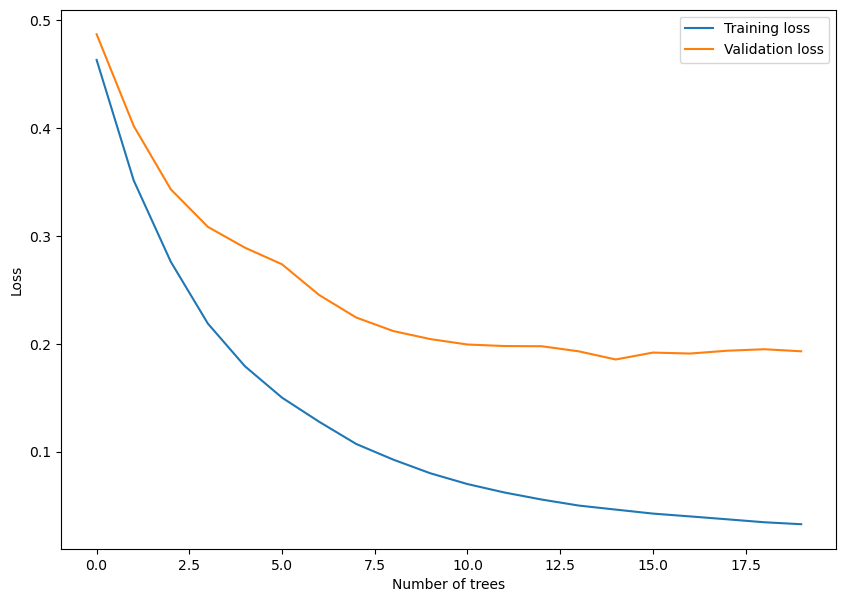

In [6]:
# loss curve of xgboost
results = xgb_cls.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["logloss"], label="Training loss")
plt.plot(results["validation_1"]["logloss"], label="Validation loss")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend();

In [9]:
cv_results = cross_validate(xgb_cls, X, y, cv=10, scoring=["f1"],
                            return_train_score=True)
print(cv_results['test_f1'].mean())
print(cv_results['train_f1'].mean())

0.9406243169484878
1.0


*  we use f1 score beacuse dataset is imbalanced 
* and there is overfitting in xgboost model because f1 score of training dataset is 1.0.

In [10]:
xgboost_params = {"learning_rate": [0.1, 0.05],
                  "max_depth": [1,2,3],
                  "n_estimators": [20,30,50,70,90], 
                  "reg_lambda" :[2,3],
                  "gamma":[2,3],
                  "subsample":[0.5],
                    "min_child_weight": [3,4],
                    "colsample_bytree":[0.4],
                  "colsample_bylevel":[0.4],
                  "colsample_bynode":[0.4]
                 }

fit_params={"eval_set" : [[X_test, y_test]]}

* In order to reduce overfitting in hyperparameter optimization, we decreased the values of parameters such as subsample col_by* ,min_child_weight,max_depth,n_estimators and increased the gamma,lambda values.

In [11]:
xgboost_best_grid = GridSearchCV(xgb_cls, xgboost_params,
                                 cv=7, n_jobs=-1,
                                 return_train_score=True).fit(X, y,**fit_params,verbose=0)

In [12]:
xgboost_best_grid.best_params_

{'colsample_bylevel': 0.4,
 'colsample_bynode': 0.4,
 'colsample_bytree': 0.4,
 'gamma': 2,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 90,
 'reg_lambda': 3,
 'subsample': 0.5}

In [13]:
xgboost_best_grid.best_score_

0.9286834733893556

In [14]:
# create final xgboost model
xgbm_final = xgb_cls.set_params(**xgboost_best_grid.best_params_, 
                                random_state=17, ).fit(X, y)


cv_results = cross_validate(xgbm_final, X, y, cv=10,
                            scoring=["f1"],return_train_score=True)

print(cv_results['train_f1'].mean())
print(cv_results['test_f1'].mean())

0.9624421344032955
0.9417622841528617


* When we look at the f1 score of the final xgboost model with the cross validation method, we see that train f1 decreases, test f1 increases and they get very close to each other.Thus, overfitting is prevented.We can see a similar result when we look at the learning curve and loss curve.

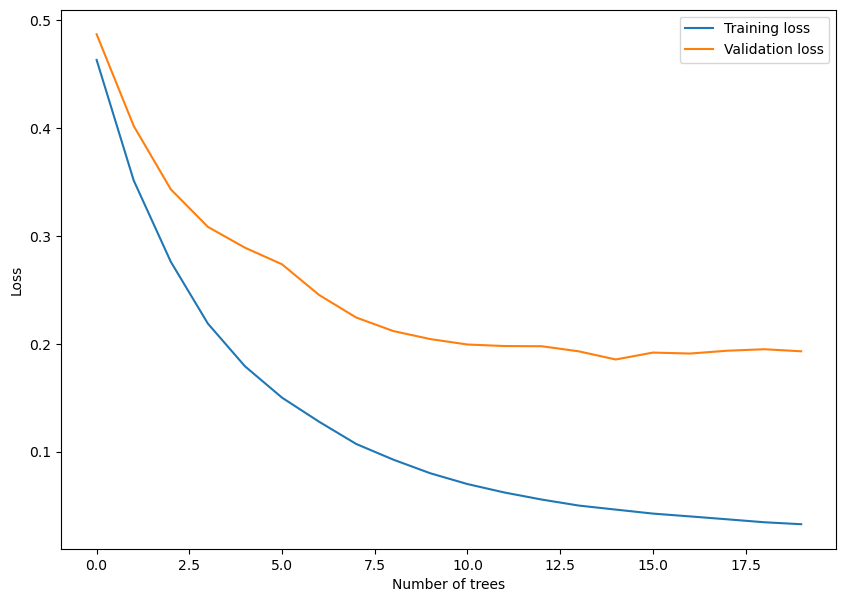

In [15]:
results = xgbm_final.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["logloss"], label="Training loss")
plt.plot(results["validation_1"]["logloss"], label="Validation loss")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend();

/Users/stefanduprey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/stefanduprey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/stefanduprey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum)

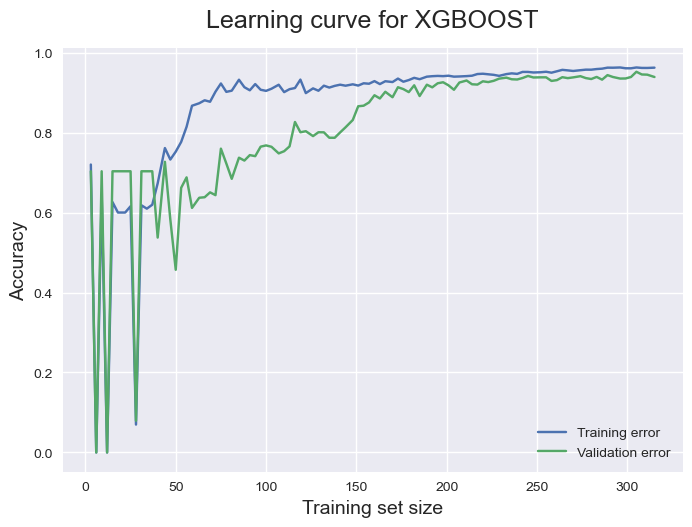

In [16]:
train_sizes, train_scores, test_scores = learning_curve(xgb_cls, X, y, cv=10,
                                                        scoring='f1', n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 100))

train_mean = np.mean(train_scores, axis=1)
validation_mean = np.mean(test_scores, axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_mean, label = 'Training error')
plt.plot(train_sizes, validation_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for XGBOOST', fontsize = 18, y = 1.03)
plt.legend();

In [17]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

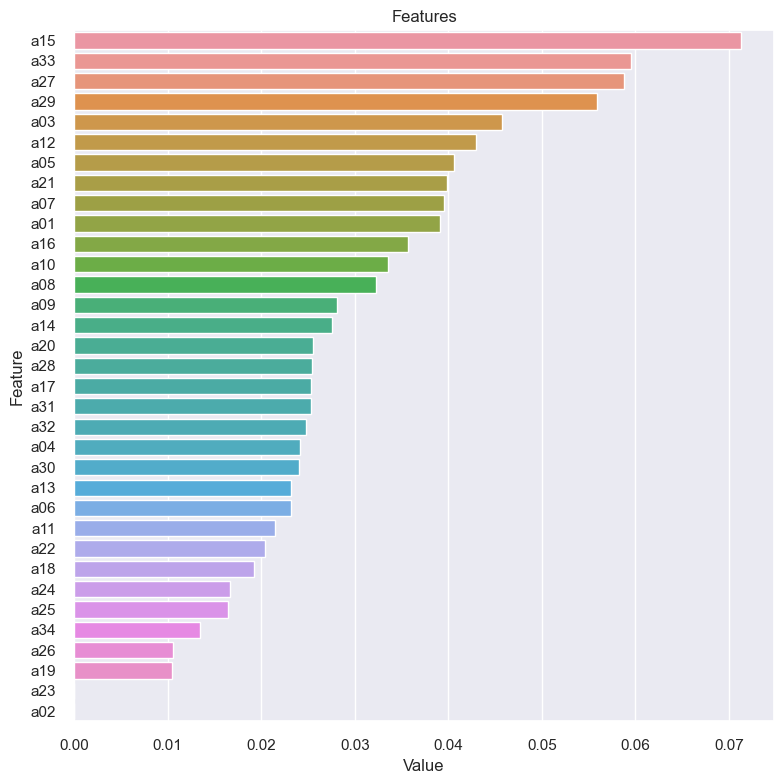

In [18]:
plot_importance(xgb_cls, X)
# When the feature importance graph is observed, 
# it is seen that the variables other than a02 and a01 are important for the xgboost model.

                                                 Summary
 * In this tutorial we covered;
  * XGBOOST differences and advantages over GBM
  * Working principle of XGBOOST algorithm,
  * Application of the XGBOOST algorithm
  * How to avoid overfititng
  * Parameters of the GBM model
  * Hyperparameter optimization of the GBM model

References:
* miuul.com -> Machine Learning Course
* https://xgboost.readthedocs.io/en/stable/index.html

* https://www.veribilimiokulu.com/xgboost-nasil-calisir/#:~:text=XGBoost%2C%20verideki%20her%20değeri%20incelemek,sayısı%20varsayılan%20olarak%2033%20tanedir.
* https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/